# Zomato Dataset Analysis & Visualization

# Importing Libraries

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re

# Reading CSV

In [365]:
df=pd.read_csv('zomato.csv')

In [366]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [367]:
df.shape

(51717, 17)

In [368]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [369]:
df=df.drop(['url', 'address','phone','dish_liked','reviews_list','menu_item'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


# Dropping Duplicates

In [371]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [373]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7755
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

# Cleaning Name column

In [374]:
# Function to clean the name using UTF-8 encoding correction
def clean_name(name):
    if isinstance(name, str):
        try:
            # Encode to bytes and decode as UTF-8 to correct encoding issues
            cleaned_name = name.encode('latin1').decode('utf-8')
            return cleaned_name
        except Exception as e:
            print(f"Error cleaning name '{name}': {e}")  # Print error for debugging
            return name  # Return original in case of error
    return name  # Return original if it's not a string

# Apply the cleaning function
df['name'] = df['name'].apply(clean_name)

In [375]:
# Function for further cleaning of the name
def further_clean_name(name):
    if isinstance(name, str):
        name = re.sub(r'[^\x00-\x7F]+', ' ', name)  # Remove non-ASCII characters
        return name.strip()  # Strip leading/trailing whitespace
    return name

# Apply further cleaning
df['name'] = df['name'].apply(further_clean_name)

# Optionally, print unique names or first few entries for verification
print("Unique names after cleaning:")
print(df['name'].unique())


Unique names after cleaning:
['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']


In [376]:
# Optionally, if you want to see a few sample cleaned names
print("First few cleaned names:")
print(df['name'].head())

First few cleaned names:
0                    Jalsa
1           Spice Elephant
2          San Churro Cafe
3    Addhuri Udupi Bhojana
4            Grand Village
Name: name, dtype: object


In [377]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Cleaning Rate column

In [378]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

# Removing "NEW","-","/5" from Rate column

In [379]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)

df['rate']=df['rate'].apply(handlerate)
df['rate'].head()  

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [380]:
df.rate.isnull().sum()

10019

# Filling Null values in Rate column with Mean 

In [381]:
df['rate'].fillna(df['rate'].mean(), inplace=True)
df['rate'].isnull().sum()

0

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [383]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

# Dropping Null values

In [384]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [385]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [386]:
df.rename(columns={'approx_cost(for two people)':'2_plates_cost', 'listed_in(type)':'dining options'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_plates_cost,dining options,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [387]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [388]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# Listed in(city) and location, both are there, lets keep only one.

In [389]:
df=df.drop(['listed_in(city)'], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_plates_cost,dining options
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [390]:
df['2_plates_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

# Removing "," from 2_plates_cost Column

In [391]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
df['2_plates_cost']=df['2_plates_cost'].apply(handlecomma)
df['2_plates_cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [392]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_plates_cost,dining options
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Cleaning Rest Type Column¶

In [393]:
rest_type=df['rest_type'].value_counts(ascending=False)
rest_type

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [394]:
rest_typelessthan100=rest_type[rest_type<100]
rest_typelessthan100

Dessert Parlor, Bakery           85
Quick Bites, Dessert Parlor      84
Food Truck                       84
Pub, Microbrewery                83
Dessert Parlor, Beverage Shop    80
Beverage Shop, Dessert Parlor    79
Bakery, Cafe                     78
Quick Bites, Sweet Shop          75
Quick Bites, Bakery              60
Casual Dining, Microbrewery      47
Microbrewery, Pub                42
Confectionery                    42
Quick Bites, Cafe                41
Pub, Cafe                        40
Dhaba                            40
Pub, Bar                         40
Fine Dining, Bar                 39
Lounge, Casual Dining            37
Lounge, Bar                      36
Club                             36
Microbrewery                     30
Beverage Shop, Cafe              28
Cafe, Bar                        19
Quick Bites, Food Court          19
Bakery, Beverage Shop            16
Lounge, Cafe                     16
Lounge, Microbrewery             16
Casual Dining, Irani Cafee  

# Making Rest Types less than 100 in frequency as 'others'

In [395]:
def handle_rest_type(value):
    if(value in rest_typelessthan100):
        return 'Others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites                    19010
Casual Dining                  10253
Cafe                            3682
Delivery                        2574
Dessert Parlor                  2242
Takeaway, Delivery              2008
Others                          1485
Bakery                          1140
Casual Dining, Bar              1130
Beverage Shop                    863
Bar                              686
Food Court                       616
Sweet Shop                       468
Bar, Casual Dining               411
Lounge                           395
Pub                              355
Fine Dining                      345
Casual Dining, Cafe              311
Beverage Shop, Quick Bites       293
Bakery, Quick Bites              286
Mess                             264
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                     163
C

# Cleaning Location Column

In [396]:
location=df['location'].value_counts(ascending=False)
location

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [397]:
locationlessthan50=location[location<50]
locationlessthan50

Koramangala             48
East Bangalore          43
Jalahalli               38
Magadi Road             34
Rammurthy Nagar         32
Langford Town           27
Sankey Road             27
Old Madras Road         22
Mysore Road             22
Kanakapura Road         19
KR Puram                18
Uttarahalli             17
Hebbal                  14
North Bangalore         14
Nagarbhavi               9
Kengeri                  8
Central Bangalore        8
West Bangalore           6
Yelahanka                5
Jakkur                   3
Rajarajeshwari Nagar     2
Peenya                   1
Name: location, dtype: int64

In [398]:
def handle_location(value):
    if(value in locationlessthan50):
        return 'Others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
RT Nagar                   78
Vijay Nagar                78
Sanjay Nagar               76
Sadashiv Nagar             63
Sahakara Nagar             53
Name: location, Length: 72, dtype: int64

In [399]:
df['dining options'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: dining options, dtype: int64

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            51042 non-null  object 
 1   online_order    51042 non-null  object 
 2   book_table      51042 non-null  object 
 3   rate            51042 non-null  float64
 4   votes           51042 non-null  int64  
 5   location        51042 non-null  object 
 6   rest_type       51042 non-null  object 
 7   cuisines        51042 non-null  object 
 8   2_plates_cost   51042 non-null  float64
 9   dining options  51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [401]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_plates_cost,dining options
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# Data is Clean, Lets jump to Visualization

# 1. What is total number of Online and Offline orders?

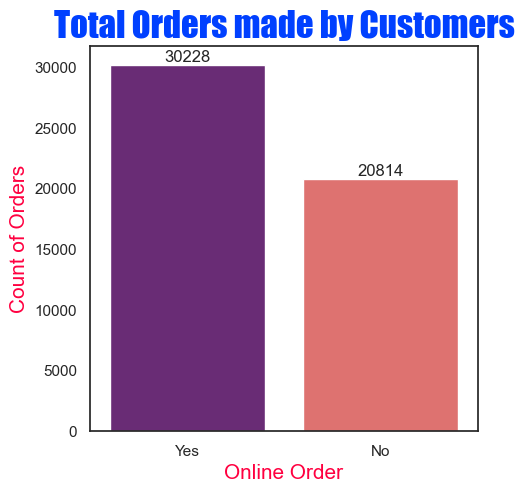

In [402]:
order_count3=sb.countplot(data=df,x='online_order',palette='magma')
for bars in order_count3.containers:
    order_count3.bar_label(bars)  
sb.set(rc={'figure.figsize':(5,5)})
sb.set_style('white')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Online Order', fontdict=font2)  # x-axis label
plt.ylabel('Count of Orders', fontdict=font2)      #  y-axis label
plt.title('Total Orders made by Customers', fontdict=font1)  

# Show the plot
plt.show()

### Insight 1: Online Orders are made more by customers than Offline Orders

# 2. How many votes has each dining option received from customers?

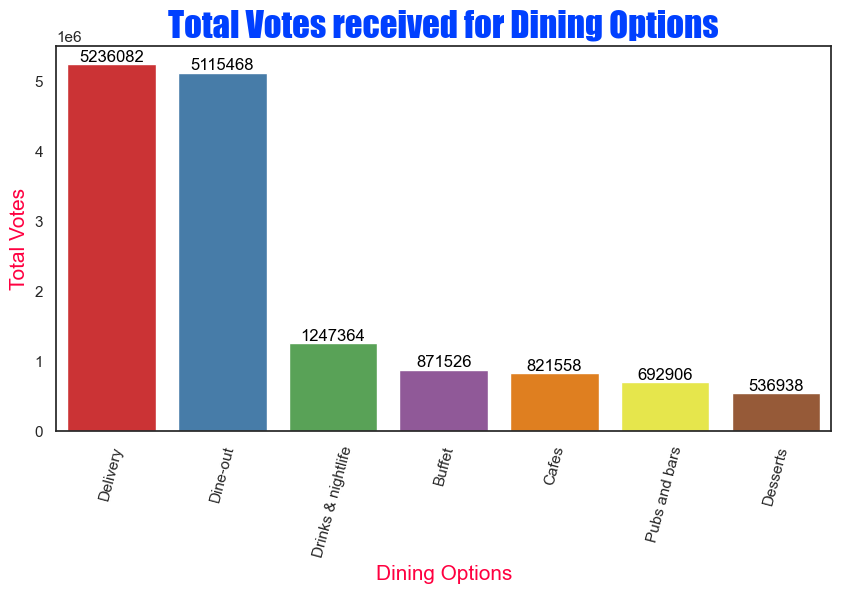

In [403]:
# Grouping and summing the votes
total_votes = df.groupby(['dining options'], as_index=False)['votes'].sum().sort_values(by='votes', ascending=False)

# Create the figure first
plt.figure(figsize=(10,5))

# Creating the bar plot
bar_plot = sb.barplot(data=total_votes, x='dining options', y='votes', palette='Set1')

# Adding text annotations for each bar
for index, value in enumerate(total_votes['votes']):
    bar_plot.text(index, value, f'{value}', ha='center', va='bottom', color='black')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Dining Options', fontdict=font2)  # x-axis label
plt.ylabel('Total Votes', fontdict=font2)      # y-axis label
plt.title('Total Votes received for Dining Options', fontdict=font1)  

# Show the plot
plt.xticks(rotation=75)  
plt.show()

### Insight 2: 'Delivery' , 'Dine-out' and 'Drinks & nightlife' Dining options have received majority of votes from customers

# 3. Which mode(online or offline) has received the maximum rating?

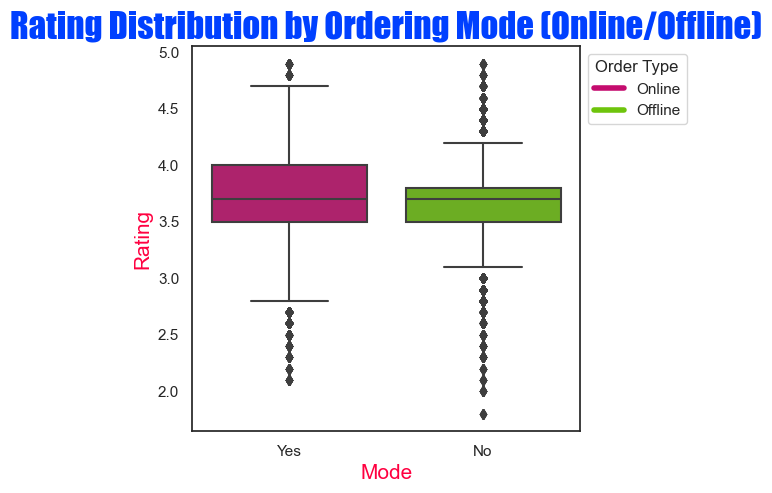

In [404]:
plt.figure(figsize=(5, 5))

# Define a color palette with the specified colors
palette = {'Yes': '#c40c6e', 'No': '#6ec40c'}
box_plot = sb.boxplot(data=df, x='online_order', y='rate', palette=palette)

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Mode', fontdict=font2)  # x-axis label
plt.ylabel('Rating', fontdict=font2)  # y-axis label
plt.title('Rating Distribution by Ordering Mode (Online/Offline)', fontdict=font1)

# Adding the legend outside the plot
handles = [plt.Line2D([0], [0], color='#c40c6e', lw=4), plt.Line2D([0], [0], color='#6ec40c', lw=4)]
labels = ['Online', 'Offline']
plt.legend(handles, labels, title='Order Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### Insight 3: Customers tend to give slightly higher ratings to online orders compared to offline orders

# 4. What are average ratings that majority of the Restaurants have received?

Average Rating: 3.7014242704990252


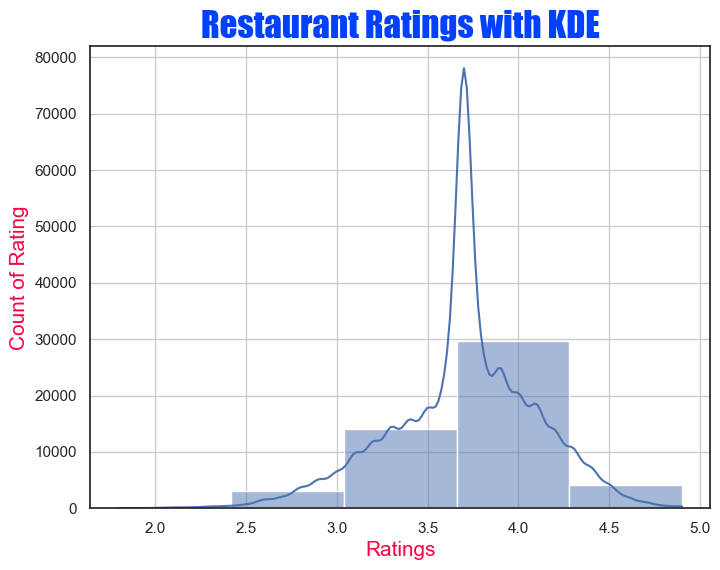

In [405]:
average_rating = df['rate'].mean()
print(f"Average Rating: {average_rating}")

# Plotting a histogram with KDE for Restaurant Ratings
plt.figure(figsize=(8, 6))
sb.histplot(df['rate'], bins=5, kde=True)

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Ratings', fontdict=font2)  # x-axis label
plt.ylabel('Count of Rating', fontdict=font2) 
plt.title('Restaurant Ratings with KDE', fontdict=font1)
plt.grid()
plt.show()

### Insight 4: Average Customer Rating received by majority of Restaurants is 3.7

# 5. What is average spending of customers on each order?

Average Spending (2 Plates Cost): 555.782982641746


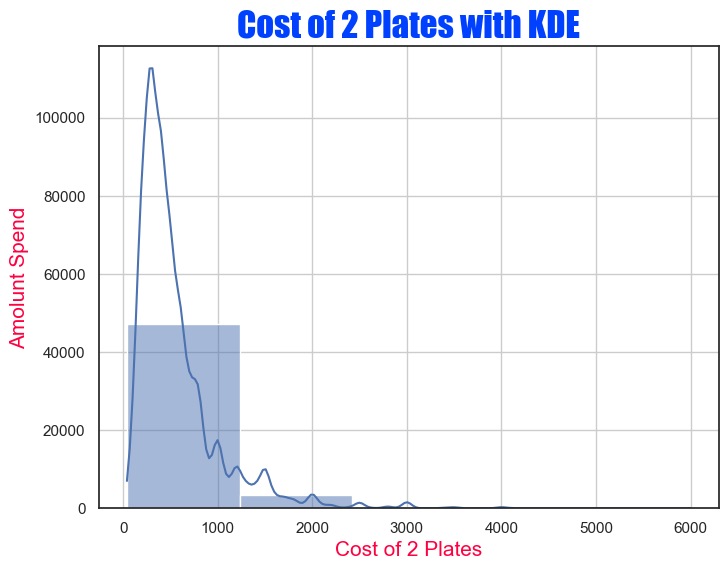

In [406]:
average_spending = df['2_plates_cost'].mean()
print(f"Average Spending (2 Plates Cost): {average_spending}")

# Plotting a histogram with KDE for Restaurant Ratings
plt.figure(figsize=(8, 6))
sb.histplot(df['2_plates_cost'], bins=5, kde=True)

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Cost of 2 Plates', fontdict=font2)  # x-axis label
plt.ylabel('Amolunt Spend', fontdict=font2)
plt.title('Cost of 2 Plates with KDE', fontdict=font1)
plt.grid()
plt.show()

### Insight 5: Average Cost of spending on 2 plates is ₹ 555.7829

# 6. Which Restaurant type have received more offline orders?

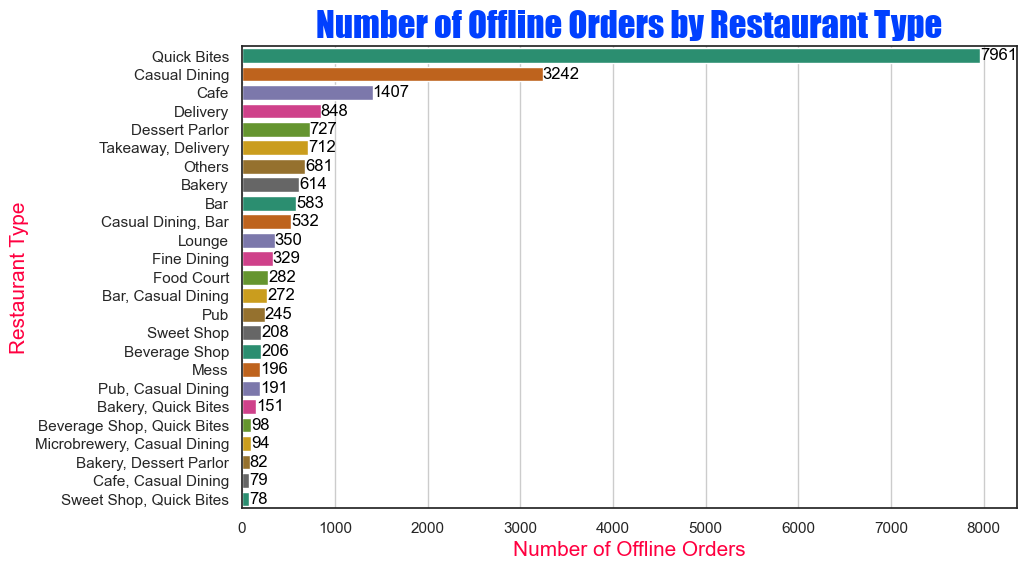

In [407]:
# Top 10 restaurant types with offline orders
offline_orders = df[df['online_order'] == 'No']['rest_type'].value_counts().head(25)

# Preparing the data 
offline_orders_df = offline_orders.reset_index()
offline_orders_df.columns = ['rest_type', 'num_offline_orders']

# Plotting using seaborn
plt.figure(figsize=(10, 6))
bar_plot1 = sb.barplot(x='num_offline_orders', y='rest_type', data=offline_orders_df, palette='Dark2')

# Adding text annotations for each bar
for patch in bar_plot1.patches:
    bar_plot1.annotate(f'{int(patch.get_width())}', 
                       (patch.get_width(), patch.get_y() + patch.get_height() / 2), 
                       ha='left', 
                       va='center', 
                       color='black')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}
plt.title("Number of Offline Orders by Restaurant Type", fontdict=font1)
plt.xlabel("Number of Offline Orders", fontdict=font2)
plt.ylabel("Restaurant Type", fontdict=font2)
plt.grid(axis='x')

# Show the plot
plt.show()

### Insight 6: 'Quick Bites', 'Casual Dining' and 'Cafe' Restaurant types have received highest number of offline orders

# 7. Which location has highest number of customer orders(online and offline)?

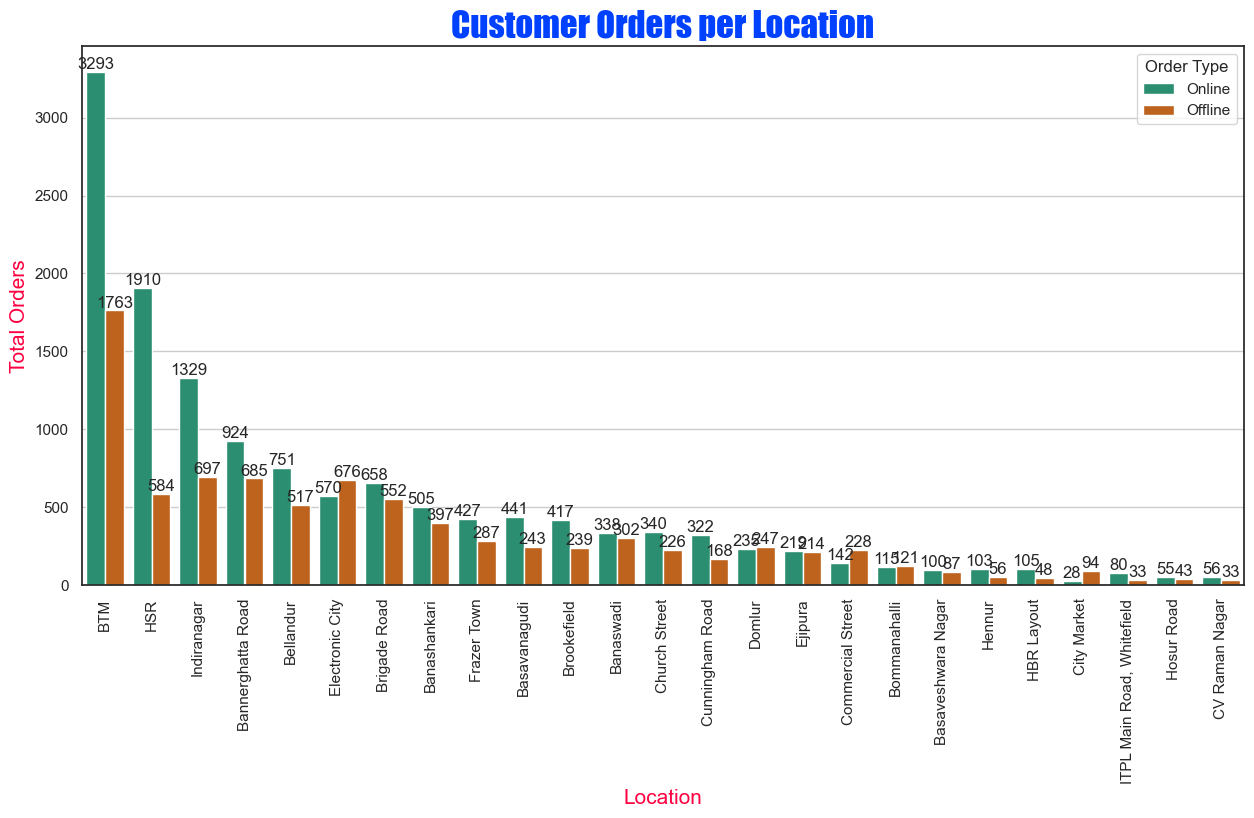

Location with highest customer orders: BTM


In [409]:
# Creating a new 'order_type' column
df['order_type'] = df['online_order'].apply(lambda x: 'Online' if x == 'Yes' else 'Offline')

# Grouping by location and order type, and counting the number of orders
location_orders = df.groupby(['location', 'order_type']).size().unstack(fill_value=0).head(25)

# Total orders = online orders + offline orders
location_orders['Total Orders'] = location_orders.sum(axis=1)

# Sort by Total Orders in descending order
location_orders = location_orders.sort_values(by='Total Orders', ascending=False)

# Reset index to prepare for plotting
location_orders_reset = location_orders.reset_index()  # 'location' should be now a column

# Melt the DataFrame for seaborn, focusing on order types
melted_location_orders = location_orders_reset.melt(id_vars='location', value_vars=['Online', 'Offline'], 
                                                     var_name='Order Type', value_name='Count')

# Plotting
plt.figure(figsize=(15, 7))
barplot = sb.barplot(data=melted_location_orders, x='location', y='Count', hue='Order Type', palette='Dark2')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding title and labels
plt.title('Customer Orders per Location',fontdict=font1)
plt.xlabel('Location',fontdict=font2)
plt.ylabel('Total Orders',fontdict=font2)
plt.xticks(rotation=90)
plt.grid(axis='y')

# Adding labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')

# Show the legend
plt.legend(title='Order Type')
plt.show()

# Location with highest customer orders
highest_orders_location = location_orders_reset.loc[0, 'location']  
print("Location with highest customer orders:", highest_orders_location)

### Insight 7: The Location with highest number of Online and Offline customer orders is BTM

# 8. Which cuisines are most ordered by customers?

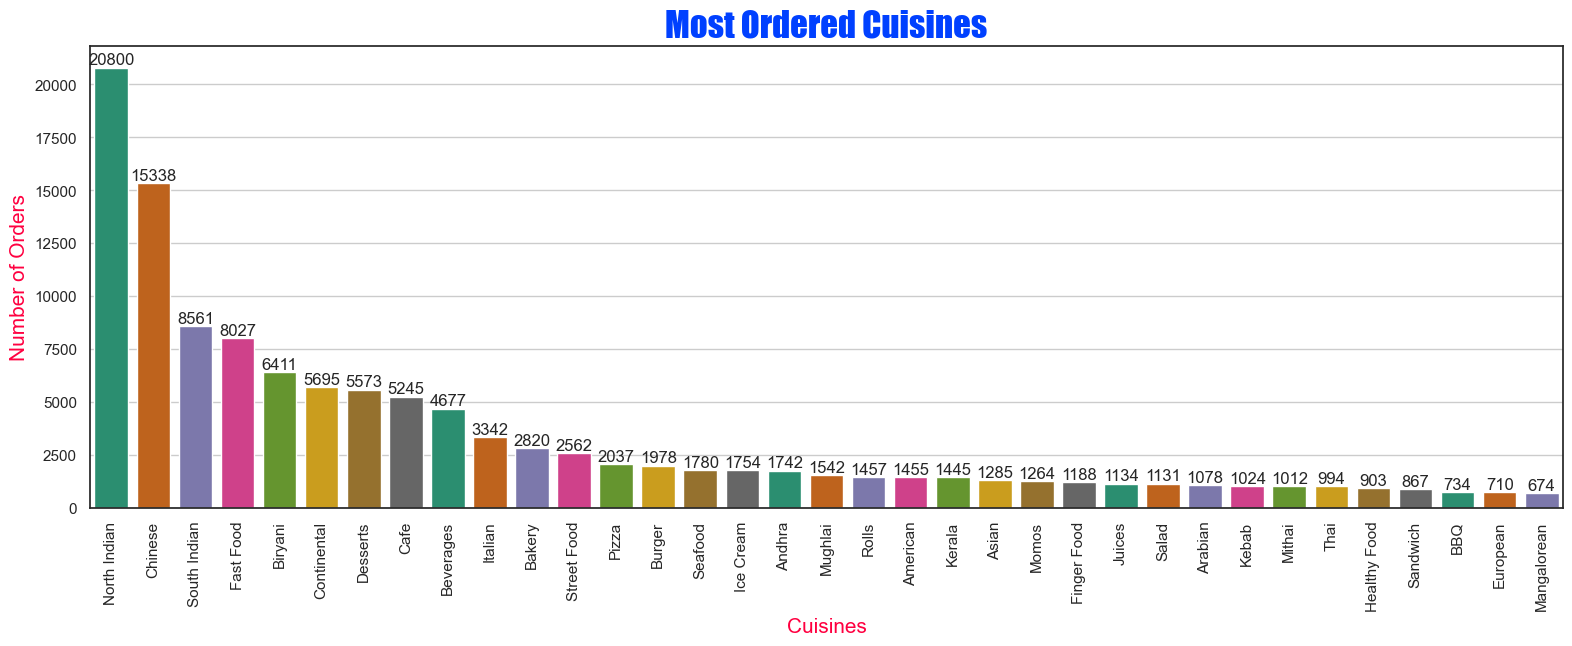

In [410]:
# Exploding the cuisines to count their occurrences
cuisines_count = df['cuisines'].str.split(', ').explode().value_counts().reset_index().head(35)
cuisines_count.columns = ['cuisine', 'count']

# Bar plot
plt.figure(figsize=(19, 6))
barplot2 = sb.barplot(data=cuisines_count, x='cuisine', y='count', palette='Dark2')

# Adding labels to each bar
for p in barplot2.patches:  # Changed from barplot to barplot2
    barplot2.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

plt.title('Most Ordered Cuisines', fontdict=font1)
plt.xlabel('Cuisines', fontdict=font2)
plt.ylabel('Number of Orders', fontdict=font2)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### Insight 8: North Indian and Chinese Cuisines are most ordered by customers

# 9. What type of Restaurants do the majority of the customers order from?

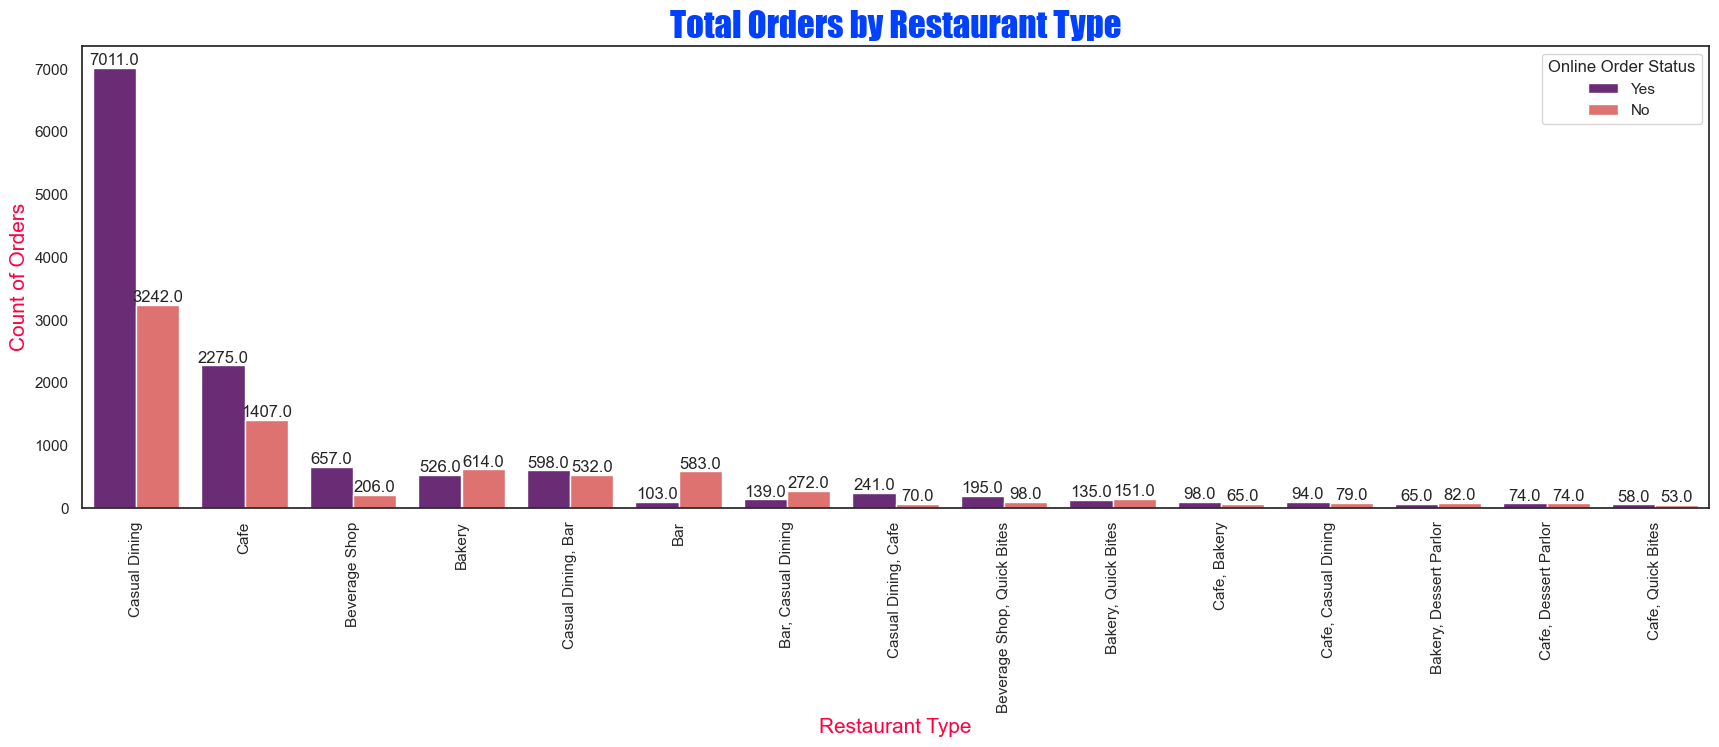

In [413]:
# Count the number of online and offline orders by restaurant type
order_counts = df.groupby(['rest_type', 'online_order']).size().reset_index(name='count').head(30)

# Sort the DataFrame by count in descending order
order_counts = order_counts.sort_values(by='count', ascending=False)

# Now we will plot the bar chart
plt.figure(figsize=(21, 6))
order_count_plot = sb.barplot(data=order_counts, x='rest_type', y='count', hue='online_order', palette='magma')

# Adding bar labels
for bars in order_count_plot.patches:
    order_count_plot.annotate(bars.get_height(), 
                              (bars.get_x() + bars.get_width() / 2, bars.get_height()), 
                              ha='center', va='bottom')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Adding x and y labels
plt.xlabel('Restaurant Type', fontdict=font2)  # Customizing the x-axis label
plt.ylabel('Count of Orders', fontdict=font2)   # Customizing the y-axis label
plt.title('Total Orders by Restaurant Type', fontdict=font1)  # Optional: Add a title

# Show the plot
plt.legend(title='Online Order Status')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability
plt.show()

### Insight 9: Customers order mostly from "Casual Dining" Restaurant type. For "Casual Dining" Restaurant type, Online orders ordered by customers are 7011.0 and Offline orders ordered by customers are 3242.0

# 10. Which cuisines are ordered online and offline?

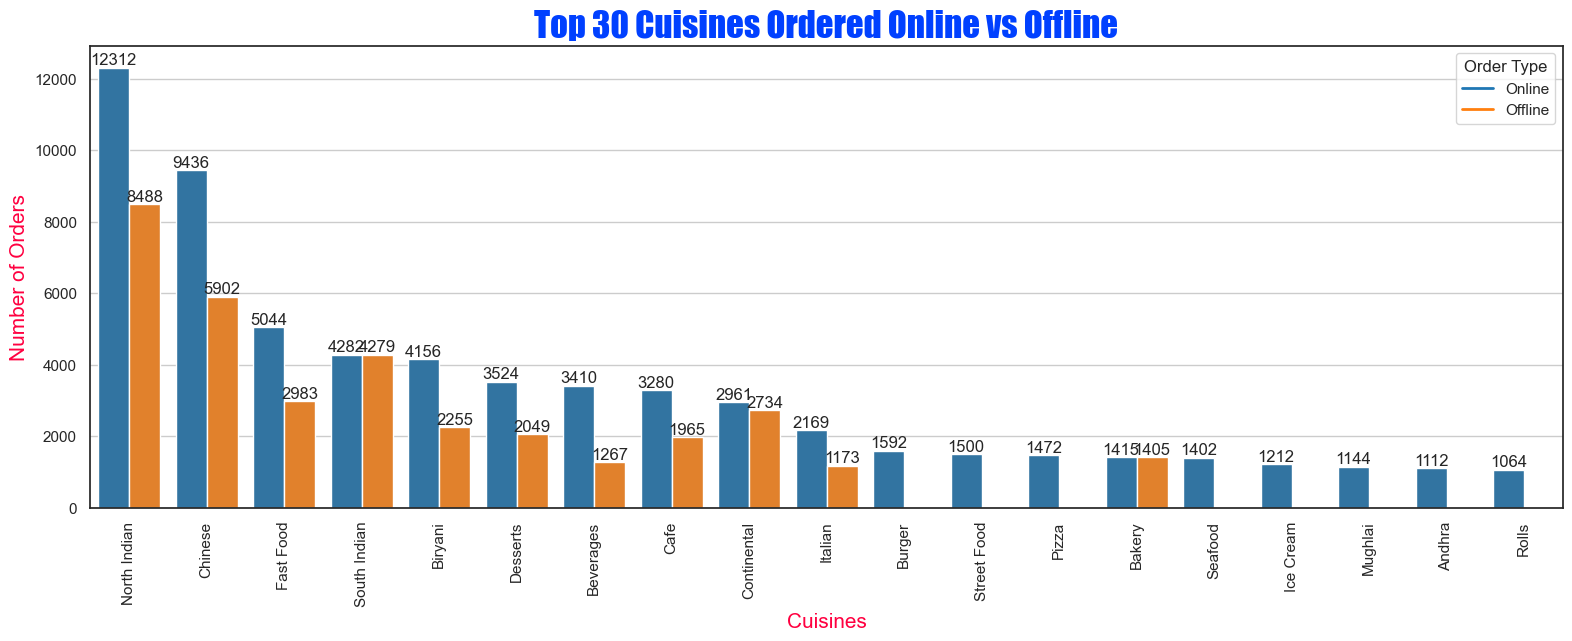

In [415]:
# Exploding the cuisines based on the order type (online or offline)
df_online = df[df['order_type'] == 'Online']
df_offline = df[df['order_type'] == 'Offline']

# Count the occurrences of each cuisine for online orders
online_cuisines_count = df_online['cuisines'].str.split(', ').explode().value_counts().reset_index()
online_cuisines_count.columns = ['cuisine', 'online_count']

# Count the occurrences of each cuisine for offline orders
offline_cuisines_count = df_offline['cuisines'].str.split(', ').explode().value_counts().reset_index()
offline_cuisines_count.columns = ['cuisine', 'offline_count']

# Merging the two dataframes on cuisine
cuisine_counts = pd.merge(online_cuisines_count, offline_cuisines_count, on='cuisine', how='outer').fillna(0)

# Melt the dataframe for easier plotting
cuisine_counts_melted = cuisine_counts.melt(id_vars='cuisine', value_vars=['online_count', 'offline_count'], 
                                              var_name='order_type', value_name='count')

# Convert counts to integers (since counts should be integers)
cuisine_counts_melted['count'] = cuisine_counts_melted['count'].astype(int)

# Filter to keep only the first 10 records for plotting
cuisine_counts_melted_top10 = cuisine_counts_melted.nlargest(30, 'count')

# Plotting
plt.figure(figsize=(19, 6))

# Directly use the hue `order_type` for coloring
color_palette = {'online_count': '#1f77b4', 'offline_count': '#ff7f0e'}

# Change the order of order_type for clarity
order_type_order = ['online_count', 'offline_count']

# Plot with correct hue
barplot = sb.barplot(data=cuisine_counts_melted_top10, x='cuisine', y='count', 
                     hue='order_type', palette=color_palette, hue_order=order_type_order)

# Adding labels to each bar
for p in barplot.patches:
    if not np.isnan(p.get_height()):  # Check for NaN values
        barplot.annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom')

# Define fonts
font1 = {'family': 'fantasy', 'size': 25, 'color': '#0040ff'}
font2 = {'family': 'sans-serif', 'size': 15, 'color': '#ff0040'}

# Creating custom legend handles with color
online = plt.Line2D([0], [0], color='#1f77b4', lw=2)
offline = plt.Line2D([0], [0], color='#ff7f0e', lw=2)

plt.title('Top 30 Cuisines Ordered Online vs Offline', fontdict=font1)
plt.xlabel('Cuisines', fontdict=font2)
plt.ylabel('Number of Orders', fontdict=font2)
plt.xticks(rotation=90)

# Set the labels to be 'Online' and 'Offline'
plt.legend(handles=[online, offline], labels=['Online', 'Offline'], title='Order Type', loc='upper right')

plt.grid(axis='y')
plt.show()

### Insight 10: North Indian and Chinese Cuisines are mostly ordered Online and Offline. Number of North Indian cuisine ordered online are 12312 and offline are 8488. Number of Chinese cuisines ordered online are 9436 and offline are 5902.


# Conclusion:

### In conclusion, we can see some clear trends in customer ordering habits. First, more customers prefer to place their orders online rather than going to restaurants. When it comes to dining, options like 'Delivery,' 'Dine-out,' and 'Drinks & nightlife' are the most popular choices. Interestingly, customers tend to rate their online dining experiences a bit higher than those they have offline.

### Most restaurants earn an average rating of 3.7, indicating that there’s room for improvement. On average, spending for two plates at a restaurant is about ₹ 555.78. For offline dining, 'Quick Bites,' 'Casual Dining,' and 'Cafes' are the top restaurant types.

### The area with the most orders, both online and offline, is BTM. In terms of food preferences, North Indian and Chinese cuisines lead the way, with many customers ordering them both online and offline. In fact, 'Casual Dining' restaurants are particularly popular, with 7,011 online orders and 3,242 offline orders from this type.

### Overall, North Indian cuisine has received 12,312 online orders and 8,488 offline orders, while Chinese cuisine has received 9,436 orders online and 5,902 orders offline. 

### This data highlights the strong preference for online orders and showcases which cuisines and dining formats customers find most appealing.